In [1]:
import pandas as pd
from inducedRainbow.spatial import kNNDistance
from utils import nucStitch
from os.path import isfile, join
from skimage.measure import regionprops_table
from random import seed
import numpy as np
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.spatial import Delaunay

In [2]:
df = pd.read_csv("/Volumes/Aortas/Aorta/results/inducedRainbow/allClusterSizesRed.csv")
nucleiPath = '/Volumes/Aortas/Aorta/segmentations/inducedRainbow/final/nuclei'

In [3]:
df

,age,aorta,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,P0-5,aorta01,409,71,27,11,3,2,1,0,0,0,0,0,0,0,0
1,P0-5,aorta02,327,58,20,9,4,2,1,0,0,0,0,0,0,0,0
2,P0-5,aorta03,270,61,31,16,6,2,3,1,0,0,0,0,0,0,0
3,P0-5,aorta04,315,104,33,14,14,2,0,2,0,0,0,1,0,0,0
4,P0-5,aorta05,228,71,25,2,7,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,P5-60,aorta04,237,167,58,32,16,10,8,2,2,1,1,1,0,0,0
57,P5-60,aorta05,192,142,38,29,14,5,3,1,1,0,0,0,0,0,0
58,P5-60,aorta06,207,173,51,34,8,9,7,0,1,1,1,0,0,0,0
59,P5-60,aorta07,147,73,15,7,2,1,0,1,1,0,0,0,0,0,0


In [4]:
dfMarked1NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked2NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked3NN = pd.DataFrame(columns= ['age', 'aorta','value'])
dfMarked4NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked5NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])

dfDivided1NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided2NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided3NN = pd.DataFrame(columns= ['age', 'aorta','value'])
dfDivided4NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided5NN = pd.DataFrame(columns= ['age', 'aorta', 'value'])

In [5]:
simulationNumber = 1000
for index, row in df.iterrows():
    marked = df.iloc[index, 2:].to_numpy().sum()
    divided = df.iloc[index, 3:].to_numpy().sum()
    markedRandomBasis = []
    dividedRandomBasis = []
    age = row["age"].split("P")[-1]
    aorta = row["aorta"]
    nucImage = nucStitch.fullNucImage16(join(nucleiPath, age, aorta))
    prop_dict = regionprops_table(nucImage, properties = ('label', 'centroid'))
    dfNuc = pd.DataFrame(prop_dict)
    nucIDs = dfNuc['label'].tolist()
    seed(42)
    for _ in range(simulationNumber):
        markedRandomBasis.append(np.asarray(kNNDistance.randomkNNDistances(nucIDs,marked, dfNuc)))
        if divided > 7:
            dividedRandomBasis.append(np.asarray(kNNDistance.randomkNNDistances(nucIDs,divided, dfNuc)))

    markedRandomTest = np.asarray(kNNDistance.randomkNNDistances(nucIDs,marked, dfNuc))
    if divided > 7:
        dividedRandomTest = np.asarray(kNNDistance.randomkNNDistances(nucIDs,divided, dfNuc))
    markedRandomBasis = np.asarray(markedRandomBasis)
    markedRandomTest = np.asarray(markedRandomTest)
    dividedRandomBasis = np.asarray(dividedRandomBasis)
    dividedRandomTest = np.asarray(dividedRandomTest)

    dfMarked1NN = pd.concat([dfMarked1NN,pd.DataFrame({"age": age, "aorta": aorta, "value": markedRandomTest[:,1].flatten()/np.mean(markedRandomBasis[:,:,1].flatten()) -1})])
    dfMarked2NN = pd.concat([dfMarked2NN,pd.DataFrame({"age": age, "aorta": aorta, "value": markedRandomTest[:,2].flatten()/np.mean(markedRandomBasis[:,:,2].flatten()) -1})])
    dfMarked3NN = pd.concat([dfMarked3NN,pd.DataFrame({"age": age, "aorta": aorta, "value": markedRandomTest[:,3].flatten()/np.mean(markedRandomBasis[:,:,3].flatten()) -1})])
    dfMarked4NN = pd.concat([dfMarked4NN,pd.DataFrame({"age": age, "aorta": aorta, "value": markedRandomTest[:,4].flatten()/np.mean(markedRandomBasis[:,:,4].flatten()) -1})])
    dfMarked5NN = pd.concat([dfMarked5NN,pd.DataFrame({"age": age, "aorta": aorta, "value": markedRandomTest[:,5].flatten()/np.mean(markedRandomBasis[:,:,5].flatten()) -1})])

    if divided > 7:
        dfDivided1NN = pd.concat([dfDivided1NN,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedRandomTest[:,1].flatten()/np.mean(dividedRandomBasis[:,:,1].flatten()) -1})])
        dfDivided2NN = pd.concat([dfDivided2NN,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedRandomTest[:,2].flatten()/np.mean(dividedRandomBasis[:,:,2].flatten()) -1})])
        dfDivided3NN = pd.concat([dfDivided3NN,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedRandomTest[:,3].flatten()/np.mean(dividedRandomBasis[:,:,3].flatten()) -1})])
        dfDivided4NN = pd.concat([dfDivided4NN,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedRandomTest[:,4].flatten()/np.mean(dividedRandomBasis[:,:,4].flatten()) -1})])
        dfDivided5NN =pd.concat([dfDivided5NN,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedRandomTest[:,5].flatten()/np.mean(dividedRandomBasis[:,:,5].flatten()) -1})])
    else:
        print(age)
        print(aorta)


21-30
aorta04
21-30
aorta05


In [6]:
dfMarked1NN['kNNType'] = "1NN"
dfMarked2NN['kNNType'] = "2NN"
dfMarked3NN['kNNType'] = "3NN"
dfMarked4NN['kNNType'] = "4NN"
dfMarked5NN['kNNType'] = "5NN"
dfMarkedAll = pd.concat([dfMarked1NN, dfMarked2NN, dfMarked3NN, dfMarked4NN, dfMarked5NN])

In [7]:
dfDivided1NN['kNNType'] = "1NN"
dfDivided2NN['kNNType'] = "2NN"
dfDivided3NN['kNNType'] = "3NN"
dfDivided4NN['kNNType'] = "4NN"
dfDivided5NN['kNNType'] = "5NN"
dfDividedAll = pd.concat([dfDivided1NN, dfDivided2NN, dfDivided3NN, dfDivided4NN, dfDivided5NN])

In [9]:
dfDividedAll.groupby(["age", "aorta"]).count()

value  kNNType
age   aorta                  
0-10  aorta01   1665     1665
      aorta02   1495     1495
      aorta03    890      890
      aorta04    640      640
      aorta05    775      775
      aorta06    530      530
0-5   aorta01    575      575
      aorta02    470      470
      aorta03    600      600
      aorta04    850      850
      aorta05    545      545
      aorta06    565      565
10-21 aorta01    785      785
      aorta02    305      305
      aorta03    615      615
      aorta04    385      385
      aorta05    690      690
10-30 aorta01    990      990
      aorta02   1220     1220
      aorta03    575      575
      aorta04    715      715
      aorta05    635      635
      aorta06    800      800
      aorta07    865      865
10-60 aorta01    540      540
      aorta02    930      930
      aorta03   1040     1040
      aorta04   1180     1180
      aorta05    455      455
      aorta06   1265     1265
21-30 aorta01    135      135
      aorta02     80       80
      aorta03    100      100
30-60 aorta01    275      275
      aorta02    125      125
      aorta03    225      225
      aorta04    230      230
      aorta05     80       80
5-10  aorta01   1180     1180
      aorta02    595      595
      aorta03    445      445
      aorta04    945      945
      aorta06    480      480
      aorta07    665      665
      aorta08    680      680
5-30  aorta01   1215     1215
      aorta02    940      940
      aorta03    560      560
      aorta04    915      915
      aorta05    650      650
      aorta06   1140     1140
5-60  aorta01    685      685
      aorta02   1275     1275
      aorta03    675      675
      aorta04   1490     1490
      aorta05   1165     1165
      aorta06   1425     1425
      aorta07    500      500
      aorta08    950      950

In [10]:
dfDividedAll

,age,aorta,value,kNNType
0,0-5,aorta01,0.125844,1NN
1,0-5,aorta01,-0.059619,1NN
2,0-5,aorta01,-0.059619,1NN
3,0-5,aorta01,0.503637,1NN
4,0-5,aorta01,-0.63214,1NN
...,...,...,...,...
185,5-60,aorta08,-0.133059,5NN
186,5-60,aorta08,-0.304341,5NN
187,5-60,aorta08,-0.029726,5NN
188,5-60,aorta08,0.096297,5NN


In [11]:
savePath = "/Users/jones/Downloads"
dfMarkedAll.to_csv(join(savePath, "markedNegativeControlkNN1Run_v2.csv"), index=False)
dfDividedAll.to_csv(join(savePath, "dividedNegativeControlkNN1Run_2.csv"), index=False)

In [15]:
dfMarked1NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked2NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked3NNMid = pd.DataFrame(columns= ['age', 'aorta','value'])
dfMarked4NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked5NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])

dfDivided1NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided2NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided3NNMid = pd.DataFrame(columns= ['age', 'aorta','value'])
dfDivided4NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided5NNMid = pd.DataFrame(columns= ['age', 'aorta', 'value'])

dfMarked1NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked2NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked3NNOut = pd.DataFrame(columns= ['age', 'aorta','value'])
dfMarked4NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfMarked5NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])

dfDivided1NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided2NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided3NNOut = pd.DataFrame(columns= ['age', 'aorta','value'])
dfDivided4NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])
dfDivided5NNOut = pd.DataFrame(columns= ['age', 'aorta', 'value'])

In [16]:
##clusters only in middle of image (positive control)

simulationNumber = 1000
for index, row in df.iterrows():
    marked = df.iloc[index, 2:].to_numpy().sum()
    divided = df.iloc[index, 3:].to_numpy().sum()
    markedRandomBasis = []
    dividedRandomBasis = []
    age = row["age"].split("P")[-1]
    aorta = row["aorta"]
    nucImage = nucStitch.fullNucImage16(join(nucleiPath, age, aorta))
    midNucImage = nucStitch.middleNucImage(join(nucleiPath, age, aorta)).astype(int)
    outNucImage = nucStitch.outsideNucImage(join(nucleiPath, age, aorta)).astype(int)
    prop_dict = regionprops_table(nucImage, properties = ('label', 'centroid'))
    dfNuc = pd.DataFrame(prop_dict)
    nucIDs = dfNuc['label'].tolist()
    seed(42)
    for _ in range(simulationNumber):
        markedRandomBasis.append(np.asarray(kNNDistance.randomkNNDistances(nucIDs,marked, dfNuc)))
        if divided > 7:
            dividedRandomBasis.append(np.asarray(kNNDistance.randomkNNDistances(nucIDs,divided, dfNuc)))

    prop_dictMid = regionprops_table(midNucImage, properties = ('label', 'centroid'))
    dfNucMid = pd.DataFrame(prop_dictMid)
    nucIDsMid = dfNucMid['label'].tolist()
    markedMid = np.asarray(kNNDistance.randomkNNDistances(nucIDsMid,marked, dfNucMid))
    if divided > 7:
        dividedMid = np.asarray(kNNDistance.randomkNNDistances(nucIDsMid,divided, dfNucMid))


    prop_dictOut = regionprops_table(outNucImage, properties = ('label', 'centroid'))
    dfNucOut = pd.DataFrame(prop_dictOut)
    nucIDsOut = dfNucOut['label'].tolist()
    markedOut = np.asarray(kNNDistance.randomkNNDistances(nucIDsOut,marked, dfNucOut))
    if divided > 7:
        dividedOut = np.asarray(kNNDistance.randomkNNDistances(nucIDsOut,divided, dfNucOut))



    markedRandomBasis = np.asarray(markedRandomBasis)
    markedMid = np.asarray(markedMid)
    markedOut = np.asarray(markedOut)
    dividedRandomBasis = np.asarray(dividedRandomBasis)
    dividedMid = np.asarray(dividedMid)
    dividedOut = np.asarray(dividedOut)

    dfMarked1NNMid = pd.concat([dfMarked1NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": markedMid[:,1].flatten()/np.mean(markedRandomBasis[:,:,1].flatten()) -1})])
    dfMarked2NNMid = pd.concat([dfMarked2NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": markedMid[:,2].flatten()/np.mean(markedRandomBasis[:,:,2].flatten()) -1})])
    dfMarked3NNMid = pd.concat([dfMarked3NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": markedMid[:,3].flatten()/np.mean(markedRandomBasis[:,:,3].flatten()) -1})])
    dfMarked4NNMid = pd.concat([dfMarked4NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": markedMid[:,4].flatten()/np.mean(markedRandomBasis[:,:,4].flatten()) -1})])
    dfMarked5NNMid = pd.concat([dfMarked5NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": markedMid[:,5].flatten()/np.mean(markedRandomBasis[:,:,5].flatten()) -1})])

    dfMarked1NNOut = pd.concat([dfMarked1NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": markedOut[:,1].flatten()/np.mean(markedRandomBasis[:,:,1].flatten()) -1})])
    dfMarked2NNOut = pd.concat([dfMarked2NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": markedOut[:,2].flatten()/np.mean(markedRandomBasis[:,:,2].flatten()) -1})])
    dfMarked3NNOut = pd.concat([dfMarked3NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": markedOut[:,3].flatten()/np.mean(markedRandomBasis[:,:,3].flatten()) -1})])
    dfMarked4NNOut = pd.concat([dfMarked4NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": markedOut[:,4].flatten()/np.mean(markedRandomBasis[:,:,4].flatten()) -1})])
    dfMarked5NNOut = pd.concat([dfMarked5NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": markedOut[:,5].flatten()/np.mean(markedRandomBasis[:,:,5].flatten()) -1})])

    if divided > 7:
        dfDivided1NNMid = pd.concat([dfDivided1NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedMid[:,1].flatten()/np.mean(dividedRandomBasis[:,:,1].flatten()) -1})])
        dfDivided2NNMid = pd.concat([dfDivided2NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedMid[:,2].flatten()/np.mean(dividedRandomBasis[:,:,2].flatten()) -1})])
        dfDivided3NNMid = pd.concat([dfDivided3NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedMid[:,3].flatten()/np.mean(dividedRandomBasis[:,:,3].flatten()) -1})])
        dfDivided4NNMid = pd.concat([dfDivided4NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedMid[:,4].flatten()/np.mean(dividedRandomBasis[:,:,4].flatten()) -1})])
        dfDivided5NNMid = pd.concat([dfDivided5NNMid,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedMid[:,5].flatten()/np.mean(dividedRandomBasis[:,:,5].flatten()) -1})])

        dfDivided1NNOut = pd.concat([dfDivided1NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedOut[:,1].flatten()/np.mean(dividedRandomBasis[:,:,1].flatten()) -1})])
        dfDivided2NNOut = pd.concat([dfDivided2NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedOut[:,2].flatten()/np.mean(dividedRandomBasis[:,:,2].flatten()) -1})])
        dfDivided3NNOut = pd.concat([dfDivided3NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedOut[:,3].flatten()/np.mean(dividedRandomBasis[:,:,3].flatten()) -1})])
        dfDivided4NNOut = pd.concat([dfDivided4NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedOut[:,4].flatten()/np.mean(dividedRandomBasis[:,:,4].flatten()) -1})])
        dfDivided5NNOut = pd.concat([dfDivided5NNOut,pd.DataFrame({"age": age, "aorta": aorta, "value": dividedOut[:,5].flatten()/np.mean(dividedRandomBasis[:,:,5].flatten()) -1})])


In [17]:
dfMarked1NNMid['kNNType'] = "1NN"
dfMarked2NNMid['kNNType'] = "2NN"
dfMarked3NNMid['kNNType'] = "3NN"
dfMarked4NNMid['kNNType'] = "4NN"
dfMarked5NNMid['kNNType'] = "5NN"
dfMarkedAllMid = pd.concat([dfMarked1NNMid, dfMarked2NNMid, dfMarked3NNMid, dfMarked4NNMid, dfMarked5NNMid])

dfMarked1NNOut['kNNType'] = "1NN"
dfMarked2NNOut['kNNType'] = "2NN"
dfMarked3NNOut['kNNType'] = "3NN"
dfMarked4NNOut['kNNType'] = "4NN"
dfMarked5NNOut['kNNType'] = "5NN"
dfMarkedAllOut = pd.concat([dfMarked1NNOut, dfMarked2NNOut, dfMarked3NNOut, dfMarked4NNOut, dfMarked5NNOut])

In [18]:
dfDivided1NNMid['kNNType'] = "1NN"
dfDivided2NNMid['kNNType'] = "2NN"
dfDivided3NNMid['kNNType'] = "3NN"
dfDivided4NNMid['kNNType'] = "4NN"
dfDivided5NNMid['kNNType'] = "5NN"
dfDividedAllMid = pd.concat([dfDivided1NNMid, dfDivided2NNMid, dfDivided3NNMid, dfDivided4NNMid, dfDivided5NNMid])

dfDivided1NNOut['kNNType'] = "1NN"
dfDivided2NNOut['kNNType'] = "2NN"
dfDivided3NNOut['kNNType'] = "3NN"
dfDivided4NNOut['kNNType'] = "4NN"
dfDivided5NNOut['kNNType'] = "5NN"
dfDividedAllOut = pd.concat([dfDivided1NNOut, dfDivided2NNOut, dfDivided3NNOut, dfDivided4NNOut, dfDivided5NNOut])

In [23]:
dfDividedAllOut

,age,aorta,value,kNNType
0,0-5,aorta01,-0.700787,1NN
1,0-5,aorta01,-0.700787,1NN
2,0-5,aorta01,-0.397508,1NN
3,0-5,aorta01,-0.134617,1NN
4,0-5,aorta01,-0.397508,1NN
...,...,...,...,...
185,5-60,aorta08,-0.542828,5NN
186,5-60,aorta08,-0.193931,5NN
187,5-60,aorta08,-0.394591,5NN
188,5-60,aorta08,-0.465423,5NN


In [24]:
savePath = "/Users/jones/Downloads"
dfMarkedAllMid.to_csv(join(savePath, "markedPositiveControlMidkNN1Run.csv"), index=False)
dfMarkedAllOut.to_csv(join(savePath, "markedPositiveControlOutkNN1Run.csv"), index=False)
dfDividedAllMid.to_csv(join(savePath, "dividedPositiveControlMidkNN1Run.csv"), index=False)
dfDividedAllOut.to_csv(join(savePath, "dividedPositiveControlOutkNN1Run.csv"), index=False)

In [1]:
dfMarked5NNOut["value"].max()

NameError: name 'dfMarked5NNOut' is not defined

In [33]:
prop_dict = regionprops_table(nucImage, properties = ('label', 'centroid'))
dfNuc = pd.DataFrame(prop_dict)
nucIDs = dfNuc['label'].tolist()

In [34]:
points = dfNuc.iloc[:,1:]

In [37]:
hull = ConvexHull(points)

In [38]:
hull

In [39]:
hull.simplices

array([[ 3093,     5],
       [13103, 11288],
       [13103, 13101],
       [ 9642, 13101],
       [10183, 10172],
       [ 3128,  3093],
       [ 3128,  9642],
       [   39,   263],
       [ 7234, 10172],
       [11285, 11288],
       [11285, 10183],
       [    0,     5],
       [    0,    39],
       [  310,   263],
       [  310,  7234]], dtype=int32)

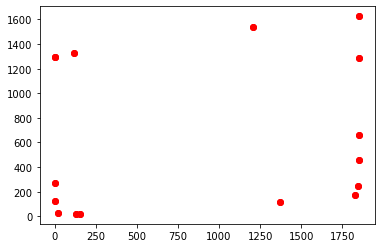

In [48]:
import matplotlib.pyplot as plt
#plt.plot(pointsNP[:,0], pointsNP[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(pointsNP[simplex, 0], pointsNP[simplex, 1], 'ro')
#plt.plot(pointsNP[hull.vertices,0], pointsNP[hull.vertices,1], 'r--', lw=2)
plt.plot(pointsNP[hull.vertices[0],0], pointsNP[hull.vertices[0],1], 'ro')
plt.show()

In [57]:
hullPoints = []
for simplex in hull.simplices:
    hullPoints.append([pointsNP[simplex, 0], pointsNP[simplex, 1]])

In [58]:
hullPoints

[[array([1.26666667, 1.1875    ]), array([1294.06666667,  274.1875    ])],
 [array([1852.66666667, 1853.08695652]),
  array([1287.38095238,  658.08695652])],
 [array([1852.66666667, 1851.88888889]),
  array([1287.38095238, 1626.05555556])],
 [array([1208.2       , 1851.88888889]),
  array([1535.66666667, 1626.05555556])],
 [array([1847.25      , 1829.95454545]), array([249.22727273, 175.25      ])],
 [array([118.56521739,   1.26666667]), array([1324.30434783, 1294.06666667])],
 [array([ 118.56521739, 1208.2       ]),
  array([1324.30434783, 1535.66666667])],
 [array([ 22.26086957, 132.47368421]), array([27.04347826, 19.42105263])],
 [array([1373.38888889, 1829.95454545]), array([117.27777778, 175.25      ])],
 [array([1851.4       , 1853.08695652]), array([455.73333333, 658.08695652])],
 [array([1851.4 , 1847.25]), array([455.73333333, 249.22727273])],
 [array([1.8   , 1.1875]), array([121.93333333, 274.1875    ])],
 [array([ 1.8       , 22.26086957]), array([121.93333333,  27.04347826

In [42]:
pointsNP = points.to_numpy()

In [51]:
def in_hull(p, hull):
    """
    Test if points in `p` are in `hull`

    `p` should be a `NxK` coordinates of `N` points in `K` dimensions
    `hull` is either a scipy.spatial.Delaunay object or the `MxK` array of the
    coordinates of `M` points in `K`dimensions for which Delaunay triangulation
    will be computed
    """
    from scipy.spatial import Delaunay
    if not isinstance(hull,Delaunay):
        hull = Delaunay(hull)

    return hull.find_simplex(p)>=0